In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy 
import random
import math
import csv
from scipy.stats import poisson 
from scipy.integrate import quad
import sklearn.metrics.pairwise as sk
import seaborn as sns

# Setting Parameters

In [2]:
N_all = 1540
n_tasks = 14
n_latent = 2
n_missing_values = 50
n_folds = 1
epochs = 500
plot_interpolation = "None"
missing_experiment = True
kernel = 'NS_M32_Periodic'
folder = '../Data/UK_Crime_Data/Separable_Sum/' + kernel + '/'

# Importing Data

In [3]:
outputs_noMissing = np.load(folder + 'outputs_missing.npy')
outputs = np.load(folder + 'outputs.npy')
inputs = np.load(folder + 'inputs.npy')
original_inputs = np.load(folder + 'original_inputs.npy')

In [4]:
# Normal Prior Experiment
final_dataset_MT_Normal = np.load(folder + 'final_dataset_Normal_MCPM_'+ str(missing_experiment)+'.npy')[0]
latent_means_MT_Normal = np.load(folder + 'latent_means_Normal_MCPM_'+str(missing_experiment)+'.npy')
latent_vars_MT_Normal = np.load(folder + 'latent_variances_Normal_MCPM_'+str(missing_experiment)+'.npy')
means_w_MT_Normal = np.load(folder + 'means_weights_Normal_MCPM_'+str(missing_experiment)+'.npy')
vars_w_MT_Normal = np.load(folder + 'covars_weights_Normal_MCPM_'+str(missing_experiment)+'.npy')
offsets_MT_Normal = np.load(folder + 'offsets_Normal_MCPM_'+str(missing_experiment)+'.npy')
nelbo_MT_Normal = np.load(folder + 'nelbo_values_Normal_MCPM_'+str(missing_experiment)+'10.npy')
times_Normal = np.load(folder + 'time_iterations_Normal_MCPM_'+str(missing_experiment)+'10.npy')

# Predictions
predictions_MT_Normal = final_dataset_MT_Normal[:,17:31]

In [5]:
# GP Prior Experiment
final_dataset_MT_GP = np.load(folder + 'final_dataset_GP_MCPM_'+ str(missing_experiment)+'.npy')[0]
latent_means_MT_GP = np.load(folder + 'latent_means_GP_MCPM_'+str(missing_experiment)+'.npy')
latent_vars_MT_GP = np.load(folder + 'latent_variances_GP_MCPM_'+str(missing_experiment)+'.npy')
means_w_MT_GP = np.load(folder + 'means_weights_GP_MCPM_'+str(missing_experiment)+'.npy')
vars_w_MT_GP = np.load(folder + 'covars_weights_GP_MCPM_'+str(missing_experiment)+'.npy')
offsets_MT_GP = np.load(folder + 'offsets_GP_MCPM_'+str(missing_experiment)+'.npy')
nelbo_MT_GP = np.load(folder + 'nelbo_values_GP_MCPM_'+str(missing_experiment)+'10.npy')
times_GP = np.load(folder + 'time_iterations_GP_MCPM_'+str(missing_experiment)+'10.npy')

# Predictions
predictions_MT_GP = final_dataset_MT_GP[:,17:31]

## Indeces of Missing Values

In [6]:
index = np.zeros((n_tasks,n_missing_values))
index[0] = np.concatenate((range(10,35),range(54,79)))
index[1] = np.concatenate((range(430,440),range(474,484),range(518,528),range(562,572),range(606,616)))
index[2] = np.concatenate((range(120,130),range(154,174),range(198,218)))
index[3] = np.concatenate((range(50,75),range(94,119)))
index[4] = np.concatenate((range(1295,1305),range(1339,1349),range(1383,1393),range(1427,1437),range(1471,1481)))
index[5] = np.concatenate((range(904,924),range(948,968),range(992,1002)))
index[6] = np.concatenate((range(1427,1452),range(1471,1496)))
index[7] = np.concatenate((range(750,775),range(794,819)))
index[8] = np.concatenate((range(550,570),range(594,614),range(638,648)))
index[9] = np.concatenate((range(250,260),range(294,304),range(338,348),range(382,392),range(426,436)))
index[10] = np.concatenate((range(826,836),range(870,880),range(914,924),range(958,968),range(1002,1012)))
index[11] = np.concatenate((range(635,660),range(679,704)))
index[12] = np.concatenate((range(1101,1121),range(1145,1165),range(1189,1199)))
index[13] = np.concatenate((range(1453,1478),range(1497,1522)))

indeces_missing = np.transpose(np.reshape(np.concatenate((index[0], index[1], index[2], index[3], index[4], index[5], index[6], 
                                                          index[7], index[8], index[9], index[10], index[11], index[12], 
                                                          index[13])), (n_tasks, n_missing_values)))

In [7]:
# creating array for missing values
masked_array = np.zeros((n_tasks,N_all))
for i in range(13):
    index = indeces_missing[:,i]
    for j in range(len(index)):
        #print(index[j])
        masked_array[i,int(index[j])] = 1

# Plotting Results

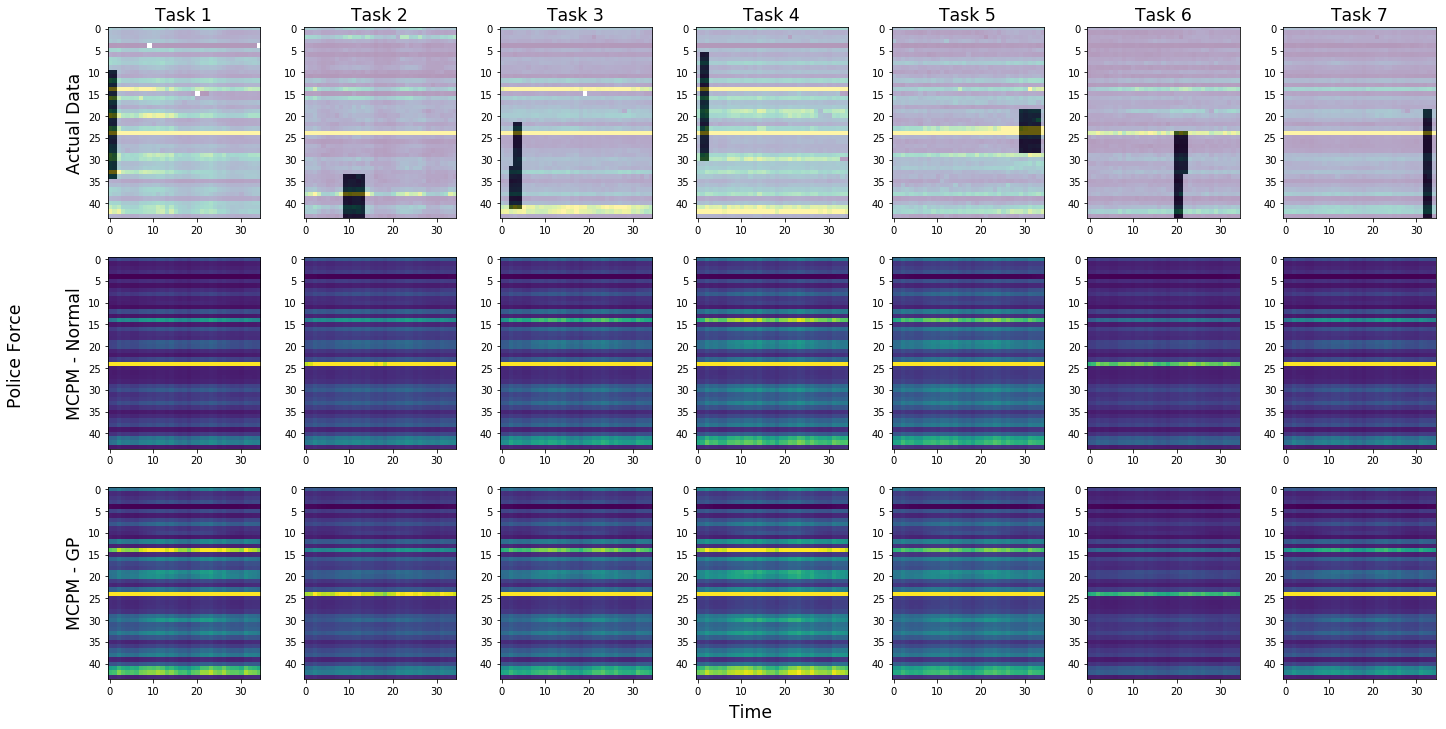

In [8]:
# Plotting Task 1 - 7 Results
fig, axes = plt.subplots(nrows=3,ncols=7,figsize=(24,12))
(ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, 
 ax15, ax16, ax17, ax18, ax19, ax20, ax21) = axes.flatten()
fig.text(0.5, 0.08, 'Time', ha='center', fontsize='xx-large')
fig.text(0.07, 0.5, 'Police Force', va='center', rotation='vertical', fontsize='xx-large')
ax1.set_ylabel('Actual Data',fontsize='xx-large')
ax8.set_ylabel('MCPM - Normal',fontsize='xx-large')
ax15.set_ylabel('MCPM - GP',fontsize='xx-large')

ax1.imshow(outputs[:,0].reshape(35,44).T,vmax=7500)
ax1.imshow(masked_array[0].reshape(35,44).T, interpolation='nearest', cmap="binary", alpha=0.6)
ax1.set_title('Task 1',fontsize='xx-large')
ax2.imshow(outputs[:,1].reshape(35,44).T,vmax=700)
ax2.imshow(masked_array[1].reshape(35,44).T, interpolation='nearest', cmap="binary", alpha=0.6)
ax2.set_title('Task 2',fontsize='xx-large')
ax3.imshow(outputs[:,2].reshape(35,44).T,vmax=2500)
ax3.imshow(masked_array[2].reshape(35,44).T, interpolation='nearest', cmap="binary", alpha=0.6)
ax3.set_title('Task 3',fontsize='xx-large')
ax4.imshow(outputs[:,3].reshape(35,44).T,vmax=2500)
ax4.imshow(masked_array[3].reshape(35,44).T, interpolation='nearest', cmap="binary", alpha=0.6)
ax4.set_title('Task 4',fontsize='xx-large')
ax5.imshow(outputs[:,4].reshape(35,44).T,vmax=750)
ax5.imshow(masked_array[4].reshape(35,44).T, interpolation='nearest', cmap="binary", alpha=0.6)
ax5.set_title('Task 5',fontsize='xx-large')
ax6.imshow(outputs[:,5].reshape(35,44).T,vmax=1000)
ax6.imshow(masked_array[5].reshape(35,44).T, interpolation='nearest', cmap="binary", alpha=0.6)
ax6.set_title('Task 6',fontsize='xx-large')
ax7.imshow(outputs[:,6].reshape(35,44).T,vmax=4000)
ax7.imshow(masked_array[6].reshape(35,44).T, interpolation='nearest', cmap="binary", alpha=0.6)
ax7.set_title('Task 7',fontsize='xx-large')

ax8.imshow(predictions_MT_Normal[:,0].reshape(35,44).T,vmax=7500)
ax9.imshow(predictions_MT_Normal[:,1].reshape(35,44).T,vmax=700)
ax10.imshow(predictions_MT_Normal[:,2].reshape(35,44).T,vmax=2500)
ax11.imshow(predictions_MT_Normal[:,3].reshape(35,44).T,vmax=2500)
ax12.imshow(predictions_MT_Normal[:,4].reshape(35,44).T,vmax=750)
ax13.imshow(predictions_MT_Normal[:,5].reshape(35,44).T,vmax=1000)
ax14.imshow(predictions_MT_Normal[:,6].reshape(35,44).T,vmax=4000)

ax15.imshow(predictions_MT_GP[:,0].reshape(35,44).T,vmax=7500)
ax16.imshow(predictions_MT_GP[:,1].reshape(35,44).T,vmax=700)
ax17.imshow(predictions_MT_GP[:,2].reshape(35,44).T,vmax=2500)
ax18.imshow(predictions_MT_GP[:,3].reshape(35,44).T,vmax=2500)
ax19.imshow(predictions_MT_GP[:,4].reshape(35,44).T,vmax=750)
ax20.imshow(predictions_MT_GP[:,5].reshape(35,44).T,vmax=1000)
ax21.imshow(predictions_MT_GP[:,6].reshape(35,44).T,vmax=4000)

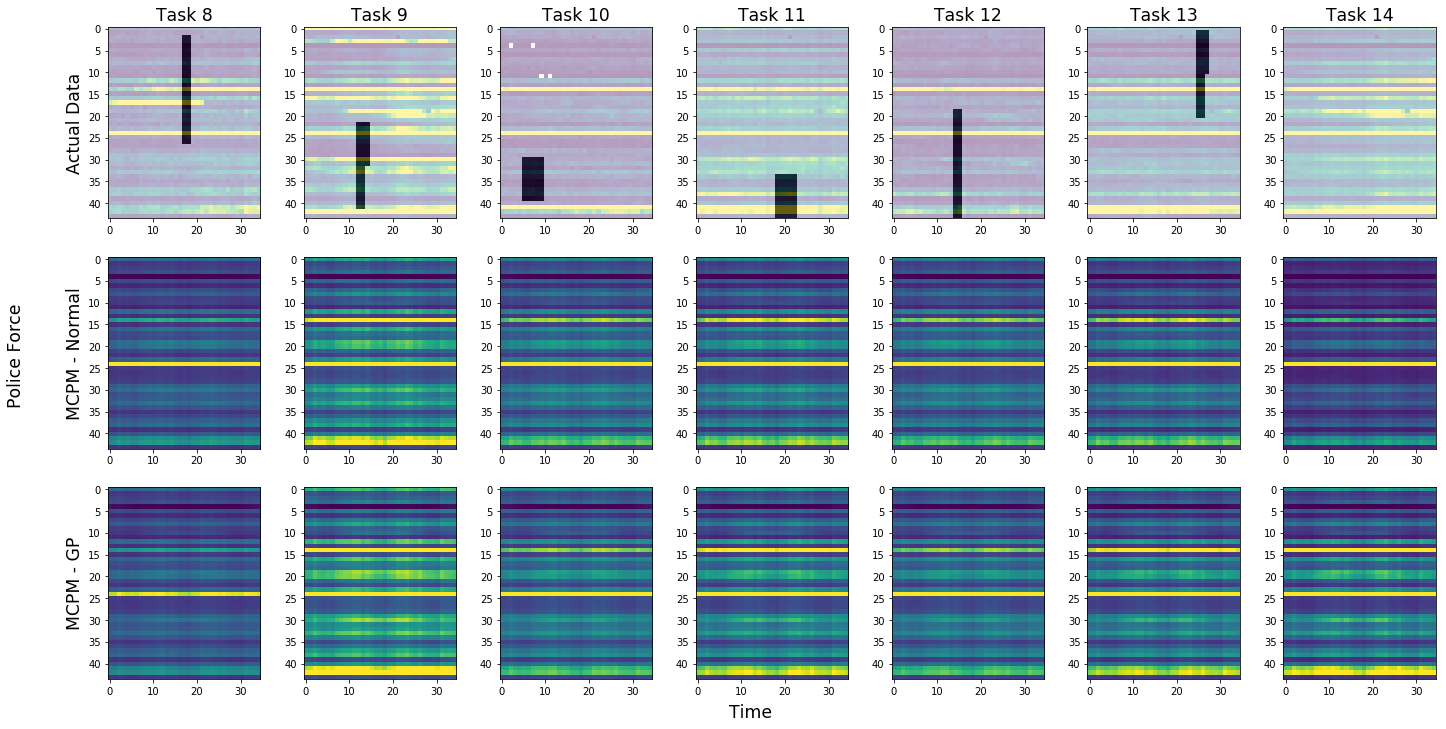

In [9]:
# Plotting Task 8 - 14 Results
fig, axes = plt.subplots(nrows=3,ncols=7,figsize=(24,12))
(ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, 
 ax15, ax16, ax17, ax18, ax19, ax20, ax21) = axes.flatten()
fig.text(0.5, 0.08, 'Time', ha='center', fontsize='xx-large')
fig.text(0.07, 0.5, 'Police Force', va='center', rotation='vertical', fontsize='xx-large')
ax1.set_ylabel('Actual Data',fontsize='xx-large')
ax8.set_ylabel('MCPM - Normal',fontsize='xx-large')
ax15.set_ylabel('MCPM - GP',fontsize='xx-large')

ax1.imshow(outputs[:,7].reshape(35,44).T,vmax=250)
ax1.imshow(masked_array[7].reshape(35,44).T, interpolation='nearest', cmap="binary", alpha=0.6)
ax1.set_title('Task 8',fontsize='xx-large')
ax2.imshow(outputs[:,8].reshape(35,44).T,vmax=1250)
ax2.imshow(masked_array[8].reshape(35,44).T, interpolation='nearest', cmap="binary", alpha=0.6)
ax2.set_title('Task 9',fontsize='xx-large')
ax3.imshow(outputs[:,9].reshape(35,44).T,vmax=400)
ax3.imshow(masked_array[9].reshape(35,44).T, interpolation='nearest', cmap="binary", alpha=0.6)
ax3.set_title('Task 10',fontsize='xx-large')
ax4.imshow(outputs[:,10].reshape(35,44).T,vmax=1500)
ax4.imshow(masked_array[10].reshape(35,44).T, interpolation='nearest', cmap="binary", alpha=0.6)
ax4.set_title('Task 11',fontsize='xx-large')
ax5.imshow(outputs[:,11].reshape(35,44).T,vmax=500)
ax5.imshow(masked_array[11].reshape(35,44).T, interpolation='nearest', cmap="binary", alpha=0.6)
ax5.set_title('Task 12',fontsize='xx-large')
ax6.imshow(outputs[:,12].reshape(35,44).T,vmax=2000)
ax6.imshow(masked_array[12].reshape(35,44).T, interpolation='nearest', cmap="binary", alpha=0.6)
ax6.set_title('Task 13',fontsize='xx-large')
ax7.imshow(outputs[:,13].reshape(35,44).T,vmax=6000)
ax7.imshow(masked_array[13].reshape(35,44).T, interpolation='nearest', cmap="binary", alpha=0.6)
ax7.set_title('Task 14',fontsize='xx-large')

ax8.imshow(predictions_MT_Normal[:,7].reshape(35,44).T,vmax=250)
ax9.imshow(predictions_MT_Normal[:,8].reshape(35,44).T,vmax=1250)
ax10.imshow(predictions_MT_Normal[:,9].reshape(35,44).T,vmax=400)
ax11.imshow(predictions_MT_Normal[:,10].reshape(35,44).T,vmax=1500)
ax12.imshow(predictions_MT_Normal[:,11].reshape(35,44).T,vmax=500)
ax13.imshow(predictions_MT_Normal[:,12].reshape(35,44).T,vmax=2000)
ax14.imshow(predictions_MT_Normal[:,13].reshape(35,44).T,vmax=6000)

ax15.imshow(predictions_MT_GP[:,7].reshape(35,44).T,vmax=250)
ax16.imshow(predictions_MT_GP[:,8].reshape(35,44).T,vmax=1250)
ax17.imshow(predictions_MT_GP[:,9].reshape(35,44).T,vmax=400)
ax18.imshow(predictions_MT_GP[:,10].reshape(35,44).T,vmax=1500)
ax19.imshow(predictions_MT_GP[:,11].reshape(35,44).T,vmax=500)
ax20.imshow(predictions_MT_GP[:,12].reshape(35,44).T,vmax=2000)
ax21.imshow(predictions_MT_GP[:,13].reshape(35,44).T,vmax=6000)

# Computing Performance of Experiments

In [10]:
# Creating Arrays for Performance Metrics
RMSE_MT_Normal = np.zeros((n_tasks))
RMSE_MT_GP = np.zeros((n_tasks))
RMSE_MT_LGCP = np.zeros((n_tasks))

NLPL_MT_Normal = np.zeros((n_tasks))
NLPL_MT_GP = np.zeros((n_tasks))
NLPL_MT_LGCP = np.zeros((n_tasks))

for task in range(n_tasks):
    RMSE_MT_Normal[task] = np.sqrt(np.sum(np.square(outputs[indeces_missing[:,task].astype(int),task] - predictions_MT_Normal[indeces_missing[:,task].astype(int),task]))/n_missing_values)
    RMSE_MT_GP[task] = np.sqrt(np.sum(np.square(outputs[indeces_missing[:,task].astype(int),task] - predictions_MT_GP[indeces_missing[:,task].astype(int),task]))/n_missing_values)
    #RMSE_MT_LGCP[task] = np.sqrt(np.sum(np.square(outputs[indeces_missing[:,task].astype(int),task] - predictions_MT_LGCP[indeces_missing[:,task].astype(int),task]))/n_missing_values)
    
    NLPL_MT_Normal[task] = - np.sum(poisson.logpmf(np.around(outputs[indeces_missing[:,task].astype(int),task]),predictions_MT_Normal[indeces_missing[:,task].astype(int),task]))/n_missing_values
    NLPL_MT_GP[task] = - np.sum(poisson.logpmf(np.around(outputs[indeces_missing[:,task].astype(int),task]),predictions_MT_GP[indeces_missing[:,task].astype(int),task]))/n_missing_values
    #NLPL_MT_LGCP[task] = - np.sum(poisson.logpmf(np.around(outputs[indeces_missing[:,task].astype(int),task]),predictions_MT_LGCP[indeces_missing[:,task].astype(int),task]))/n_missing_values

In [11]:
# Printing Normal MT Results
print('RMSE (Normal):', RMSE_MT_Normal)
print('NLPL (Normal):', NLPL_MT_Normal)
print('Total Time (Normal):', times_Normal)
print('Time per Epoch:', times_Normal/epochs)

RMSE (Normal): [4602.91604067  175.70045488  564.25567229  519.36489625  735.11386301
   81.54450438 1290.26403057   77.81493898  398.06767658   89.50985966
  305.51971522  697.51091655  261.83758234 3114.93946904]
NLPL (Normal): [2684.02032623   50.06992096   66.02931074  116.87768003  178.703386
   13.54856605  149.78484348   23.30351507  103.11228611   38.42958353
   51.03399406  175.7843092    47.75701526 1367.99675874]
Total Time (Normal): [990.15396047]
Time per Epoch: [1.98030792]


In [12]:
# Printing GP MT Results
print('RMSE (GP):', RMSE_MT_GP)
print('NLPL (GP):', NLPL_MT_GP)
print('Total Time (Normal):', times_GP)
print('Time per Epoch:', times_GP/epochs)

RMSE (GP): [2781.81364646  171.7736869   487.92943262  391.10598314  755.94002061
   90.92258056 1056.13658905   85.90729873  381.666176     99.82964564
  241.00389771  713.46897502  240.767403   1433.00410692]
NLPL (GP): [904.03865425  46.93644418  47.46052229  49.02723592 188.53003265
  15.48475022  87.61641839  27.63843921 108.33148669  45.12001265
  31.32949281 195.68741439  51.83027469 317.2475714 ]
Total Time (Normal): [1049.47844052]
Time per Epoch: [2.09895688]


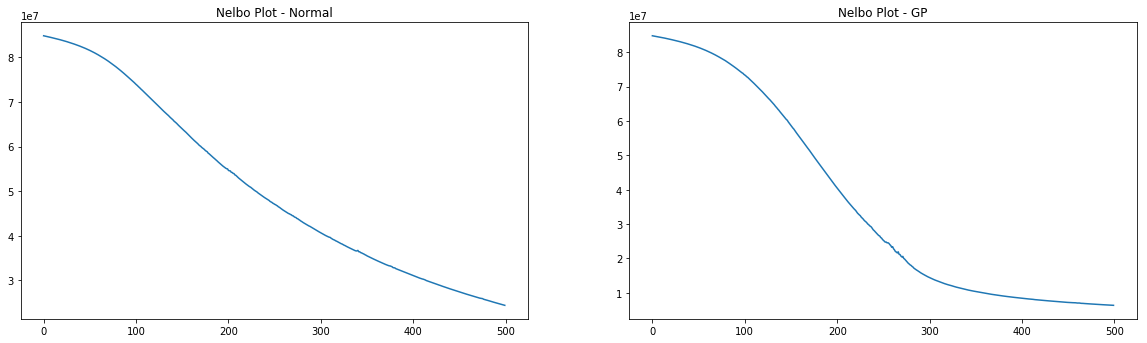

In [13]:
# Plotting Nelbo Values
plt.figure(figsize=(20,12))
ax1 = plt.subplot(221)
ax1.plot(nelbo_MT_Normal)
ax1.title.set_text('Nelbo Plot - Normal')

ax2 = plt.subplot(222)
ax2.plot(nelbo_MT_GP)
ax2.title.set_text('Nelbo Plot - GP')

#ax3 = plt.subplot(223)
#ax3.plot(nelbo_MT_LGCP)
#ax3.title.set_text('Nelbo Plot - LGCP')